In [2]:
#pip install pandas-profiling
#import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
#from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
#import plotly.express as px
from collections import Counter
%matplotlib inline

C:\Users\ADITYA\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADITYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
data=pd.read_csv("train.csv")

In [51]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 2 columns):
text         27447 non-null object
sentiment    27448 non-null object
dtypes: object(2)
memory usage: 429.0+ KB


In [48]:
data.describe()
data.dropna

<bound method DataFrame.dropna of                                                     text sentiment
0       oh Marly, I`m so sorry!!  I hope you find her...   neutral
1      Playing Ghost Online is really interesting. Th...  positive
2      is cleaning the house for her family who is co...   neutral
3      gotta restart my computer .. I thought Win7 wa...   neutral
4      SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...   neutral
...                                                  ...       ...
27443   LIKE DREW SAID 'GIVE TC A CHANCE' WE WILL MIS...  negative
27444  rec game....trying not to cry...the pain is to...  negative
27445   Sure. I`ll try n keep that up! =P You enjoy s...  positive
27446   Naw.. it was pretty tame. Only 1 guy in costu...   neutral
27447  morning twit-friends! welcome to my new followers  positive

[27448 rows x 2 columns]>

In [49]:
data.shape

(27448, 2)

In [50]:
data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['text'].head()

AttributeError: 'float' object has no attribute 'split'

In [6]:
def print_plot(index):
    example = data[data.index == index][['text', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(100)

 I had it! On my itunes, but then I lost all my songs.
Product: neutral


In [7]:
data.sentiment[data.sentiment == 'positive'] = 1
data.sentiment[data.sentiment == 'neutral'] = 0
data.sentiment[data.sentiment == 'negative'] = 2
y=data['sentiment'].astype('float')
print(y)
#plt.scatter(y,y.values())

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
27443    2.0
27444    2.0
27445    1.0
27446    0.0
27447    1.0
Name: sentiment, Length: 27448, dtype: float64


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit_transform(data['text'].values.astype('U'))
# summarize
(vectorizer.vocabulary_)
(vectorizer.idf_)
# encode document
vector = vectorizer.transform(data['text'].values.astype('U'))
# summarize encoded vector
print(vector.shape)
print(vector.toarray())
X=vector.astype('float')
print(X)

(27448, 26381)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 26150)	0.1667210857709587
  (0, 21566)	0.29553142263070453
  (0, 21523)	0.32345607648349434
  (0, 21408)	0.2002204323415255
  (0, 16854)	0.27616724172908036
  (0, 14970)	0.6172616501722223
  (0, 11971)	0.28271478093932373
  (0, 11692)	0.29516834783795376
  (0, 9627)	0.3403247151641514
  (1, 24931)	0.16124577632321754
  (1, 24437)	0.2213642831999247
  (1, 23422)	0.06593549267777635
  (1, 23169)	0.2386708593402775
  (1, 23083)	0.06862940814255636
  (1, 19140)	0.13283919280859552
  (1, 18042)	0.1899329353334714
  (1, 17749)	0.5184840692649261
  (1, 16972)	0.19944387863499455
  (1, 16345)	0.13744321088054706
  (1, 15310)	0.3124177513585243
  (1, 13575)	0.3124177513585243
  (1, 13129)	0.17970875673012615
  (1, 12800)	0.08903234527759439
  (1, 12668)	0.21147724477668467
  (1, 11476)	0.10122993280271281
  :	:
  (27446,

In [9]:
data.head()

,text,sentiment
0,"oh Marly, I`m so sorry!! I hope you find her...",0
1,Playing Ghost Online is really interesting. Th...,1
2,is cleaning the house for her family who is co...,0
3,gotta restart my computer .. I thought Win7 wa...,0
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,0


Text(0.5, 1.0, 'Dataset labels distribuition')

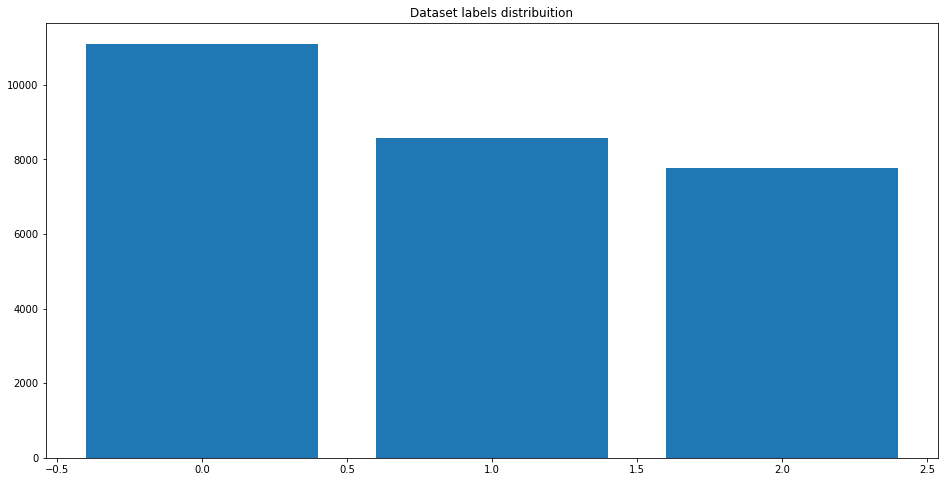

In [10]:
target_cnt=Counter(data['sentiment'])
plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [12]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0) #Basic train_test_split works here
y_test.shape

(6862,)

Lets use an SVM here

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [15]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_pred=svc.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[2184  249  273]
 [ 619 1474   54]
 [ 773   80 1156]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.81      0.70      2706
         1.0       0.82      0.69      0.75      2147
         2.0       0.78      0.58      0.66      2009

    accuracy                           0.70      6862
   macro avg       0.74      0.69      0.70      6862
weighted avg       0.72      0.70      0.70      6862



In [19]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)# logistic regression model

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
y_pred=clf.predict(x_test)

In [21]:
clf.score(x_test, y_test)

0.6879918391139609

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.79      0.68      2706
         1.0       0.80      0.67      0.73      2147
         2.0       0.76      0.56      0.65      2009

    accuracy                           0.69      6862
   macro avg       0.72      0.68      0.69      6862
weighted avg       0.71      0.69      0.69      6862



With KNN

In [23]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=7)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
y_pred=knn.predict_proba(x_test)

In [26]:
knn.score(x_test, y_test)#definetely not enough

0.5476537452637715

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [28]:
gnb.fit(x_train.todense(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred=gnb.predict_proba(x_test.todense())

In [30]:
gnb.score(x_test.todense(),y_test)#hell no...

0.38705916642378313

Give up SVM is better..

In [4]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(x_train,y_train);

NameError: name 'x_train' is not defined

In [32]:
y_pred=rf.predict(x_test)
errors = abs(y_pred - y_test)

In [33]:
rf.score(x_test,y_test)

0.14451998267775334